#  Labolatorium 3 - 31.03.2023

## Zadanie L3.1.
Rozwiąż układ równań:

$
\begin{cases}
x+2y=1 \\
3x+z=2 \\
x+7y-5z=3
\end{cases}
$

In [3]:
import numpy as np

A = np.array([[1,2,0], [3,0,1], [1,7,-5]])
B = np.array([1,2,3]).T

np.linalg.solve(A,B)

array([ 0.76,  0.12, -0.28])

## Zadanie L3.2.
Napisz procedurę, który generuje losową macierz kwadratową o wyrazach całkowitych z zakresu $[−10, 10]$ ustalonego wymiaru $N × N$ .

In [8]:
def generate_random_matrix(N):
    return np.random.randint(-10, 11, size=(N,N))


generate_random_matrix(5)

array([[ -7,   3,  -4,  -5,   8],
       [  5,   1,  -9,   7,   2],
       [ -3,   5,   1,   3,   8],
       [ -3,  -4,   5,   3,   9],
       [  9,   8, -10,  -9,  -9]])

## Zadanie L3.3.
Napisz procedurę, który generuje losowy wektor o wyrazach całkowitych z zakresu $[−10, 10]$ ustalonego wymiaru $N$.

In [9]:
def generate_random_vector(N):
    return np.random.randint(-10, 11, size=N)

generate_random_vector(2)

array([ 3, -5])

## Zadanie L3.4.
Procedura `numpy.linalg.solve(A, f)` służy do rozwiązywania układu równań liniowych z macierzą $A$ oraz prawą stroną $f$ , tj. do znajdowania takiego $x$, że zachodzi $Ax = f$.

Sprawdź dokładność tej procedury wykorzystując losowo wygenerowaną macierz $10 × 10$ w następujący sposób:

a) wygeneruj macierz $A$ procedurą z zadania L3.2,

b) wygeneruj rozwiązanie $x$ wykorzystujac procedurę z zadania L3.3,

c) określ $f$ jako $f = Ax$; w ten sposób otrzymasz prawą stronę dla znanego rozwiązania $x$,

d) znajdź przybliżone rozwiązanie $y$ przy pomocy numpy.linalg.solve,

e) oblicz błąd rozwiązania $∥x − y∥$ korzystając z numpy.linalg.norm.

Powtórz te kroki kilka razy. Czy błąd zmienia się w istotny sposób?

In [65]:
A = generate_random_matrix(10)
x = generate_random_vector(10)
f = A@x

y = np.linalg.solve(A, f)

err = np.linalg.norm(x-y)
err

5.5288660751834285e-15

## Zadanie L3.5.
Napisz program, który 1000 razy wykona procedurę z zadania L3.4, generując za każdym razem nową macierz $A$ i wektor $x$. W każdej iteracji zapisuj otrzymany błąd oraz uwarunkowanie wylosowanej macierzy (`numpy.linalg.cond`). Wykonaj wykres punktowy błędów w zależności od uwarunkowania. Czy można zaobserwować jakąś zależność?

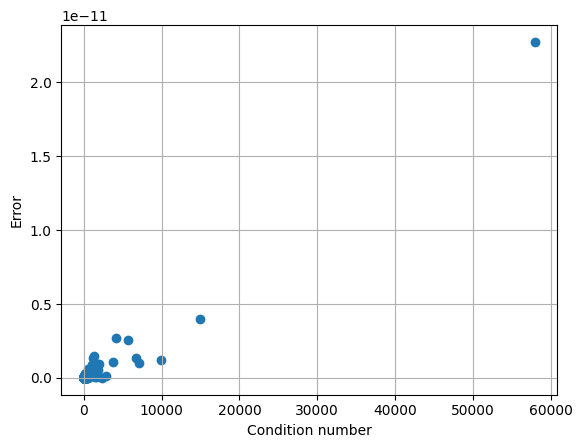

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def A(N):
    errors = []
    conds = []
    for i in range(1001):
        A = generate_random_matrix(N)
        x = generate_random_vector(N)
        f = A@x
        y = np.linalg.solve(A, f)
        err = np.linalg.norm(x-y)
        cond = np.linalg.cond(A)
        errors.append(err)
        conds.append(cond)
    return errors, conds

errors, conds = A(10)
plt.scatter(conds, errors)
plt.xlabel('Condition number')
plt.ylabel('Error')
plt.grid()
plt.show()

## Zadanie L3.6.
Wykonaj alternarywną wersję algorytmu z zadania L3.4, która zamiast korzystać z procedury numpy.linalg.solve wykorzysta do rozwiązania układu równań macierz
odwrotną $A^{−1}$, tj. rozwiąże układ równań metodą $x = A^{−1}f$.
Sprawdź dokładność takiej metody procedurą analogiczną jak w zadaniu L3.4, tj.

a) wygeneruj macierz $A$ procedurą z zadania L3.2,

b) wygeneruj rozwiązanie $x$ wykorzystujac procedurę z zadania L3.3,

c) określ $f$ jako $f = Ax$; w ten sposób otrzymasz prawą stronę dla znanego rozwiązania $x$,

d) znajdź macierz odwrotną $A^{−1}$ korzystając z `numpy.linalg.inv`,

e) znajdź przybliżone rozwiązanie $y = A^{−1}f$ przy pomocy `numpy.linalg.solve`,

f) oblicz błąd rozwiązania $∥x − y∥$ korzystając z `numpy.linalg.norm`.

Powtórz tą procedurę 1000 razy i dane umieść na wykresie błędu w zależności od uwarunkowania macierzy.


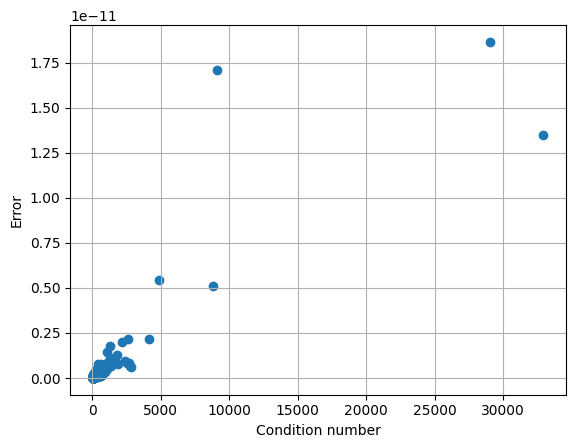

In [75]:
def A_odwr(N):
    errors = []
    conds = []
    for i in range(1001):
        A = generate_random_matrix(N)
        x = generate_random_vector(N)
        f = A@x
        A_odwr = np.linalg.inv(A)
        y = A_odwr@f
        err = np.linalg.norm(x-y)
        cond = np.linalg.cond(A)
        errors.append(err)
        conds.append(cond)

    return errors, conds

errors, conds = A_odwr(10)
plt.scatter(conds, errors, s=10)
plt.xlabel('Condition number')
plt.ylabel('Error')
plt.grid()
plt.show()

## Zadanie L3.7.
Dla macierzy wymiaru $200 × 200$ porównaj na wykresie błędy (w zależności od uwarunkowania macierzy) między metodą opierającą się o `numpy.linalg.solve` a metodą wykorzystującą odwrotność macierzy. Podobnie jak w przykładach powyżej, wykorzystaj po 1000 przypadków dla każdej metody.

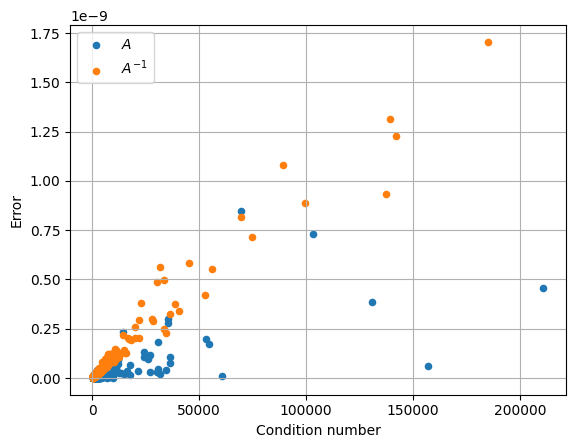

In [86]:
errorsA, condsA = A(200)
errorsAodwr, condsAodwr = A_odwr(200)

plt.scatter(condsA, errorsA, s=20, label='$A$')
plt.scatter(condsAodwr, errorsAodwr, s=20, label='$A^{-1}$')
plt.xlabel('Condition number')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

## Zadanie L3.8.
Wykonaj procedurę z zadania L3.5 dla różnych wielkości $N$ generowanych macierzy: 10, 30, 100. Nanieś otrzymane wyniki na jeden wykres różnymi kolorami.

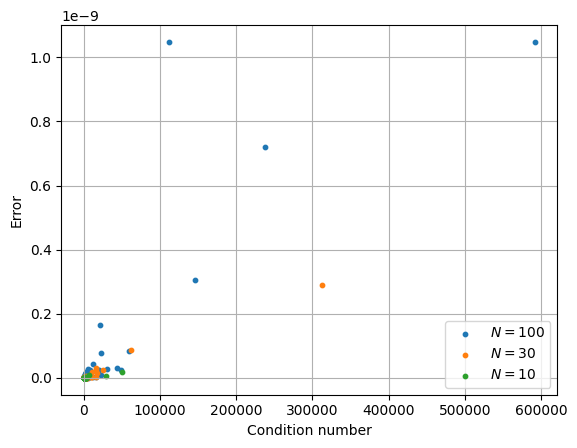

In [89]:
err10, cond10 = A(10)
err30, cond30 = A(30)
err100, cond100 = A(100)

plt.scatter(cond100, err100, s=10, label='$N=100$')
plt.scatter(cond30, err30, s=10, label='$N=30$')
plt.scatter(cond10, err10, s=10, label='$N=10$')
plt.xlabel('Condition number')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()